In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the first few rows of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#CODE-1
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print(data.isnull().sum())

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Check the transformed data
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
     Gender       Age    Height    Weight  family_history_with_overweight  \
0 -1.011914 -0.522124 -0.875589 -0.862558                        0.472291   
1 -1.011914 -0.522124 -1.947599 -1.168077                        0.472291   
2  0.988227 -0.206889  1.054029 -0.366090                        0.472291   
3  0.988227  0.423582  1.054029  0.015808                       -2.

In [6]:
from sklearn.cluster import DBSCAN
import numpy as np

# Initialize DBSCAN with eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the dataset
data['Cluster'] = clusters

# Display the number of clusters found
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise_points = list(clusters).count(-1)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Display cluster labels
data['Cluster'].value_counts()

Number of clusters found: 27
Number of noise points: 1658


Cluster
-1     1658
 1      176
 2       56
 25      39
 0       19
 10      14
 16      13
 24      11
 17      10
 21       9
 15       8
 19       8
 3        8
 4        7
 9        7
 23       7
 20       6
 26       6
 14       5
 22       5
 13       5
 12       5
 18       5
 7        5
 5        5
 6        5
 11       5
 8        4
Name: count, dtype: int64

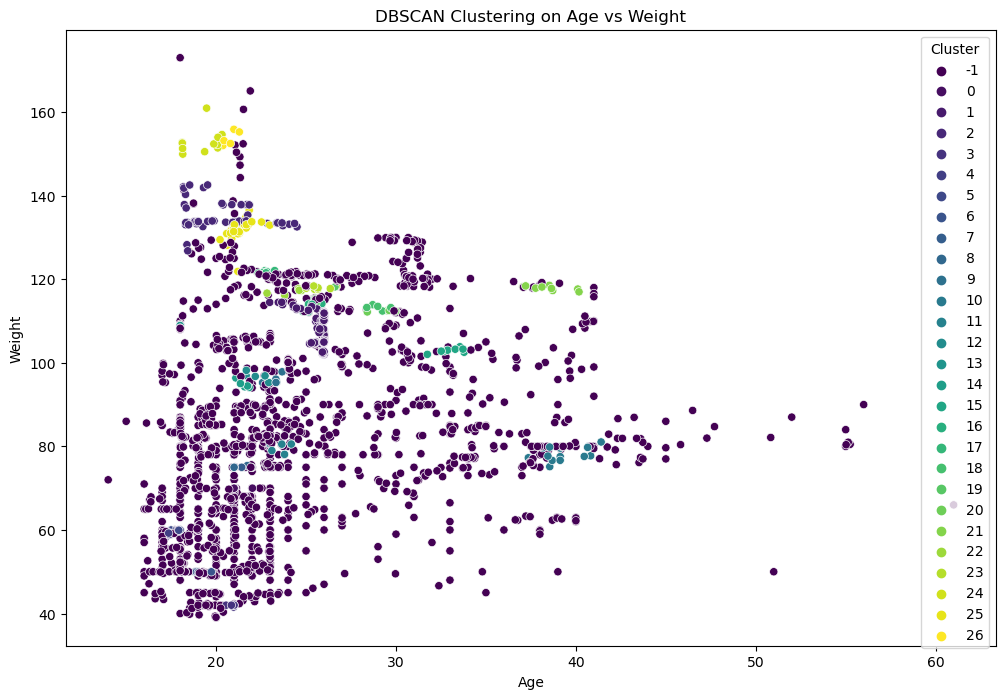

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing clusters on a pair of features
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Age', y='Weight', hue='Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering on Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [9]:
#CODE-2
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate the target from the features
features = data.drop(columns=['NObeyesdad'])  # Assuming 'NObeyesdad' is the label column
labels = data['NObeyesdad']

# Encode categorical variables
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Check the transformed data
print(pd.DataFrame(scaled_features, columns=features.columns).head())

     Gender       Age    Height    Weight  family_history_with_overweight  \
0 -1.011914 -0.522124 -0.875589 -0.862558                        0.472291   
1 -1.011914 -0.522124 -1.947599 -1.168077                        0.472291   
2  0.988227 -0.206889  1.054029 -0.366090                        0.472291   
3  0.988227  0.423582  1.054029  0.015808                       -2.117337   
4  0.988227 -0.364507  0.839627  0.122740                       -2.117337   

       FAVC      FCVC       NCP      CAEC     SMOKE      CH2O       SCC  \
0 -2.759769 -0.785019  0.404153  0.300346 -0.145900 -0.013073 -0.218272   
1 -2.759769  1.088342  0.404153  0.300346  6.853997  1.618759  4.581439   
2 -2.759769 -0.785019  0.404153  0.300346 -0.145900 -0.013073 -0.218272   
3 -2.759769  1.088342  0.404153  0.300346 -0.145900 -0.013073 -0.218272   
4 -2.759769 -0.785019 -2.167023  0.300346 -0.145900 -0.013073 -0.218272   

        FAF       TUE      CALC    MTRANS   Cluster  
0 -1.188039  0.561997  1.419172 

In [10]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the dataset
data['Cluster'] = clusters

# Display the number of clusters found
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise_points = list(clusters).count(-1)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Display cluster labels and check their distribution
print(data['Cluster'].value_counts())

Number of clusters found: 59
Number of noise points: 1002
Cluster
-1     1002
 5      265
 1      182
 41      56
 6       56
 54      42
 11      37
 0       30
 51      28
 3       25
 8       21
 34      17
 32      14
 20      13
 55      11
 30      11
 50      11
 53      10
 37      10
 46       9
 7        9
 12       9
 44       9
 15       9
 57       9
 49       8
 45       8
 56       8
 39       8
 19       8
 13       8
 4        8
 17       8
 31       7
 26       7
 40       7
 16       7
 33       7
 2        7
 18       6
 27       6
 23       6
 9        6
 43       6
 10       5
 24       5
 52       5
 14       5
 21       5
 28       5
 47       5
 42       5
 48       5
 38       5
 36       5
 35       5
 25       5
 22       5
 29       5
 58       5
Name: count, dtype: int64


NObeyesdad    0    1    2   3    4    5    6
Cluster                                     
-1          161  277  145  34    3  202  180
 0            0    1   16   0    0    2   11
 1           12    6   29  73    0   34   28
 2            0    0    7   0    0    0    0
 3            0    1    0   0    0   24    0
 4            0    0    8   0    0    0    0
 5            0    0    0   0  265    0    0
 6            0    0    0   0   56    0    0
 7            9    0    0   0    0    0    0
 8           21    0    0   0    0    0    0
 9            5    1    0   0    0    0    0
 10           5    0    0   0    0    0    0
 11          37    0    0   0    0    0    0
 12           9    0    0   0    0    0    0
 13           8    0    0   0    0    0    0
 14           5    0    0   0    0    0    0
 15           0    0    0   0    0    9    0
 16           0    0    0   0    0    7    0
 17           0    0    4   0    0    3    1
 18           0    0    0   0    0    6    0
 19       

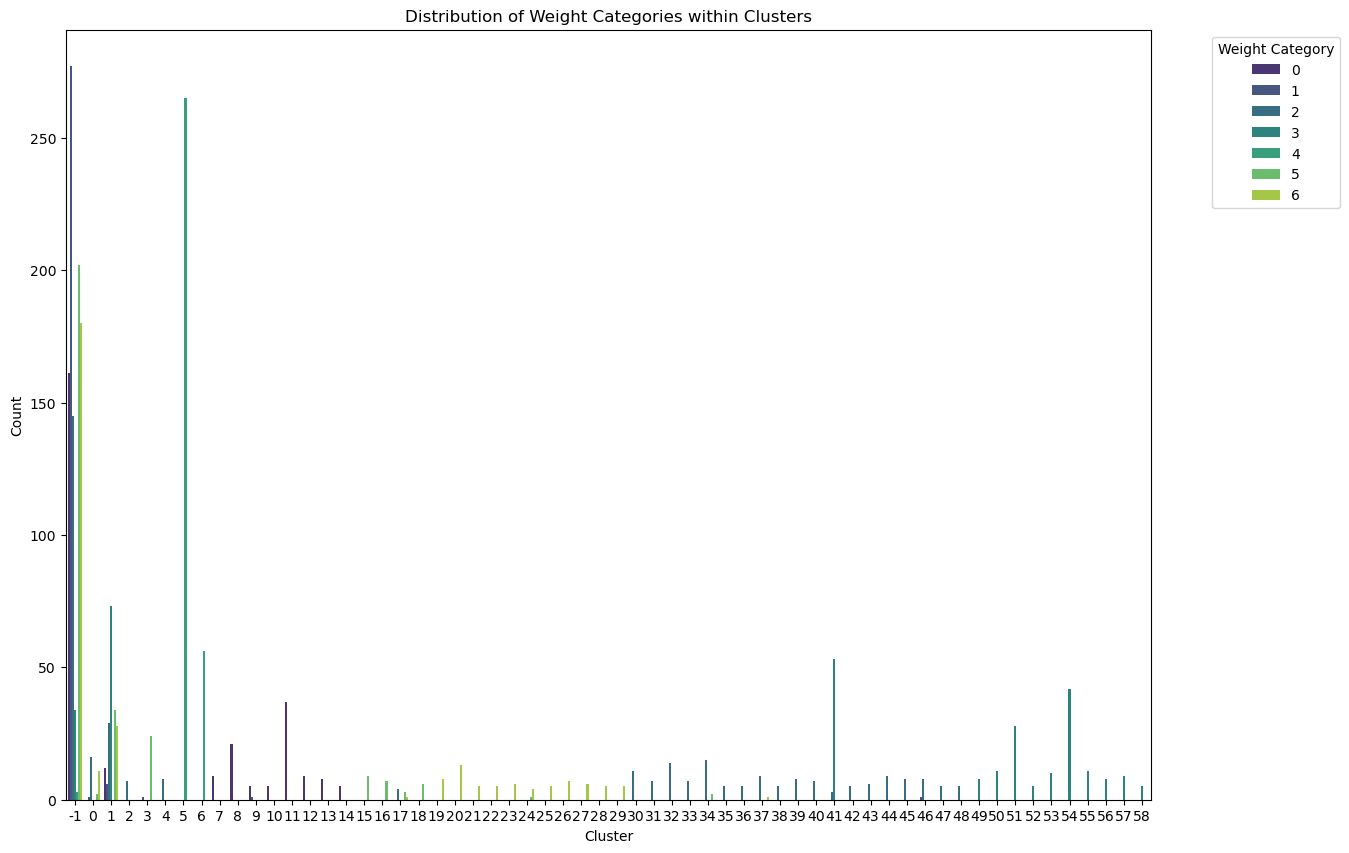

In [11]:
# Analyze the distribution of weight categories within clusters
cluster_analysis = pd.crosstab(data['Cluster'], labels)

# Display the cluster analysis
print(cluster_analysis)

# Calculate purity of each cluster
purity = cluster_analysis.max(axis=1) / cluster_analysis.sum(axis=1)
average_purity = purity.mean()
print(f"Cluster Purity: \n{purity}")
print(f"Average Cluster Purity: {average_purity:.2f}")

# Plot the cluster distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.countplot(data=data, x='Cluster', hue='NObeyesdad', palette='viridis')
plt.title('Distribution of Weight Categories within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Weight Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Number of clusters found: 5
Adjusted Rand Index: 0.07897431470364902
Silhouette Score: -0.09905372945667718


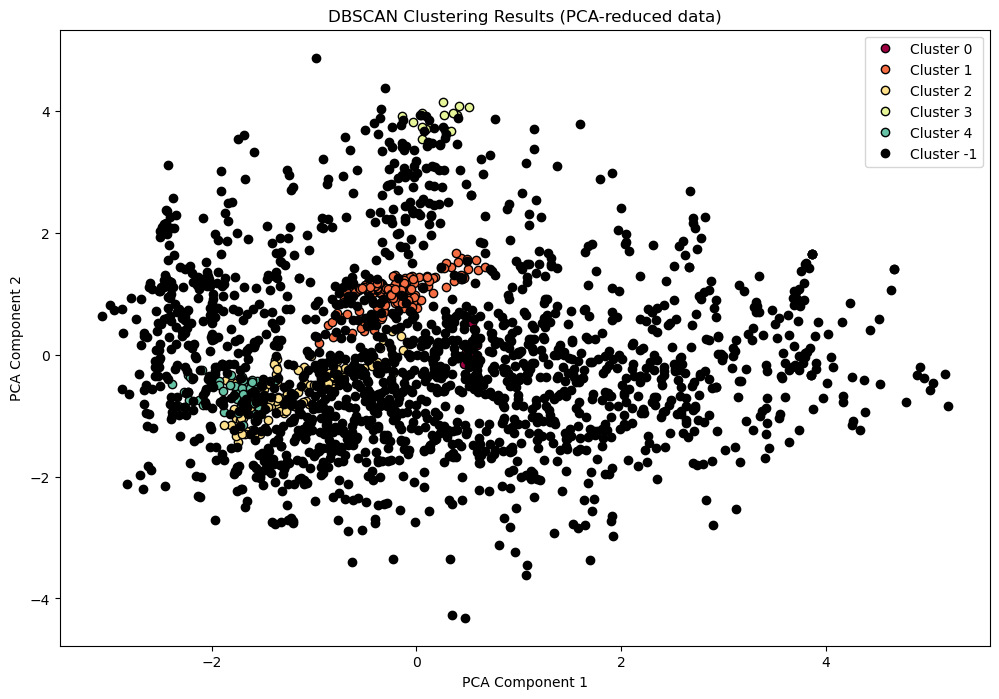

In [1]:
#CODE-3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Load the dataset
df = pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

# Separate features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=15)
dbscan.fit(X_scaled)
cluster_labels = dbscan.labels_

# Check number of clusters found (-1 indicates noise)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters found: {num_clusters}")

# Evaluate Clustering Performance
ari_score = adjusted_rand_score(y, cluster_labels)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Adjusted Rand Index: {ari_score}")
print(f"Silhouette Score: {silhouette_avg}")

# Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(12, 8))
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)
    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k}')

plt.title('DBSCAN Clustering Results (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Best eps: 0.1, Best min_samples: 10, Best silhouette score: 0.1200
Adjusted Rand Index: 0.0004


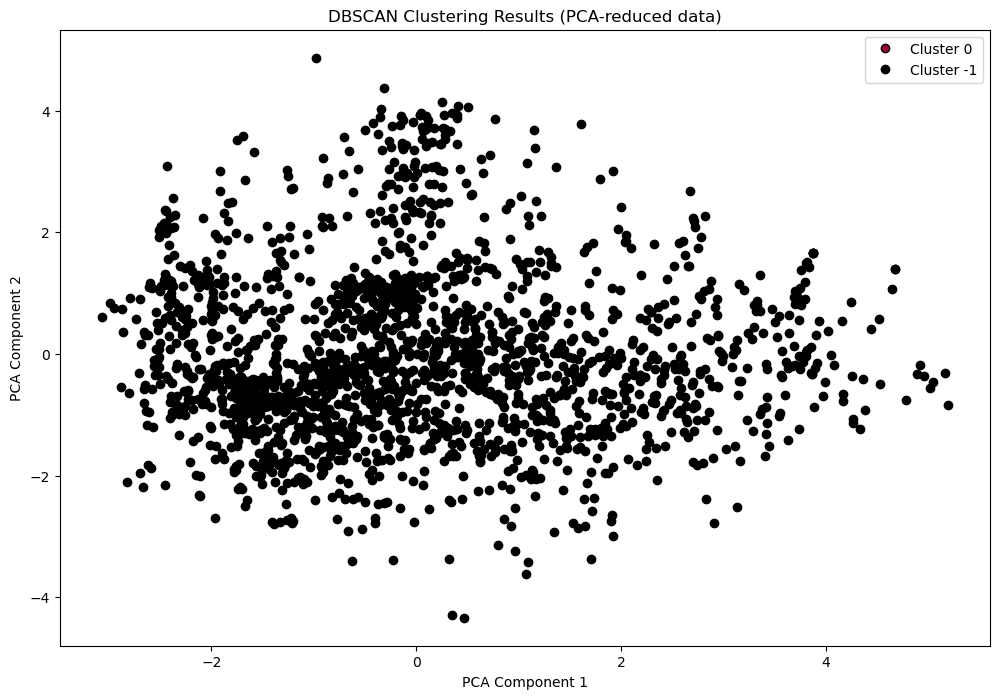

In [4]:
#CODE-4 (IMPROVING SILHOUETTE SCORE OF THE ABOVE)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the dataset
df = pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

# Separate features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Improved DBSCAN parameter tuning
best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_labels = None

# Loop through different eps and min_samples values to find the best silhouette score
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(5, 21)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Only calculate silhouette score if there are more than 1 cluster
        if len(set(labels)) > 1:
            sil_score = silhouette_score(X_scaled, labels)
            if sil_score > best_silhouette_score:
                best_silhouette_score = sil_score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

# Final DBSCAN with best parameters
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_silhouette_score:.4f}")

# Evaluate Clustering Performance with the best parameters
ari_score = adjusted_rand_score(y, best_labels)
print(f"Adjusted Rand Index: {ari_score:.4f}")

# Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(12, 8))
unique_labels = set(best_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (best_labels == k)
    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k}')

plt.title('DBSCAN Clustering Results (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()